In [174]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

### Train

In [153]:
# Load a model
model = YOLO("yolov8n.pt")

# Train the model
model.train(data="Checkers-Piece-Detection-1/data.yaml", epochs=100, imgsz=(640,400), name="n_test")

WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295

### Test

In [429]:
model = YOLO('runs/detect/n_test/weights/best.pt')

In [475]:
img = cv2.imread('raw_dataset/bax19.jpg')

In [476]:
results = model(img, verbose=False)[0].boxes.data.cpu().numpy()  # predict on an image

In [477]:
labels = {
    0: "G",
    1: "R",
    2: "g",
    3: "r",
}

In [478]:
for r in results:
    x1,y1,x2,y2,prob,cls = r
    x1,y1,x2,y2,cls = np.array([x1,y1,x2,y2,cls]).astype(int)
    cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
    cv2.putText(img, f'{labels[cls]}:{prob:.2f}', (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)

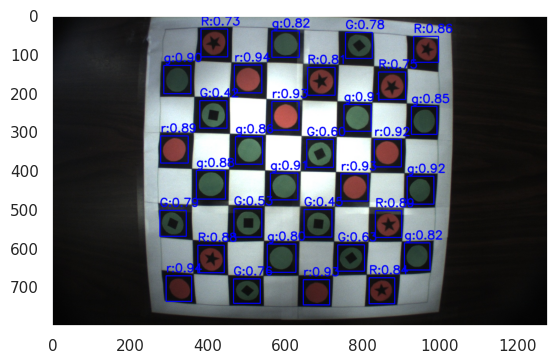

In [479]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))